### **Setup Environment, Compile C++ Codes, and Import Dependencies**

This assignment requires us to understand and apply traditional image processing techniques. Considering the efficiency of pixel traversal, I plan to use C++ as the main language and then package it into a Python package to provide an API for use in a Python notebook. I am using the third-party library pybind11 to package the C++ code. If the packaging doesn’t work, you can place the provided package in the modules folder; this package is simply a compilation of the C++ code under the scripts directory.

In [1]:
# Run the compiler
!python compile.py

running build_ext
building 'image_processing' extension
"D:\Visual Studio\VC\Tools\MSVC\14.40.33807\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -Ic:\Users\23842\.conda\envs\data\Lib\site-packages\pybind11\include -Iscripts -Ic:\Users\23842\.conda\envs\data\include -Ic:\Users\23842\.conda\envs\data\Include "-ID:\Visual Studio\VC\Tools\MSVC\14.40.33807\include" "-ID:\Visual Studio\VC\Auxiliary\VS\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22621.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\um" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\shared" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\winrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\cppwinrt" "-IC:\Program Files (x86)\Windows Kits\NETFXSDK\4.8\include\um" /EHsc /Tpscripts\bind.cpp /Fobuild\temp.win-amd64-cpython-312\Release\scripts\bind.obj -std=c++11
bind.cpp
"D:\Visual Studio\VC\Tools\MSVC\14.40.33807\bin\

cl: ������ warning D9002 :����δ֪ѡ�-std=c++11��
cl: ������ warning D9002 :����δ֪ѡ�-std=c++11��
cl: ������ warning D9002 :����δ֪ѡ�-std=c++11��
cl: ������ warning D9002 :����δ֪ѡ�-std=c++11��
cl: ������ warning D9002 :����δ֪ѡ�-std=c++11��
cl: ������ warning D9002 :����δ֪ѡ�-std=c++11��


In [2]:
from modules import *

### **Image Processing**

Before proceeding with image processing, I encapsulated an `Image` class to store information about the image, including its height, width, bytes per pixel, raw data, and so on. I then specified that the methods for image processing must be static and return a new image to ensure that the original image information remains unchanged. This principle will always apply: the image's data is read-only and cannot be modified.

For detailed API information, please refer to the `README.md` file.

---

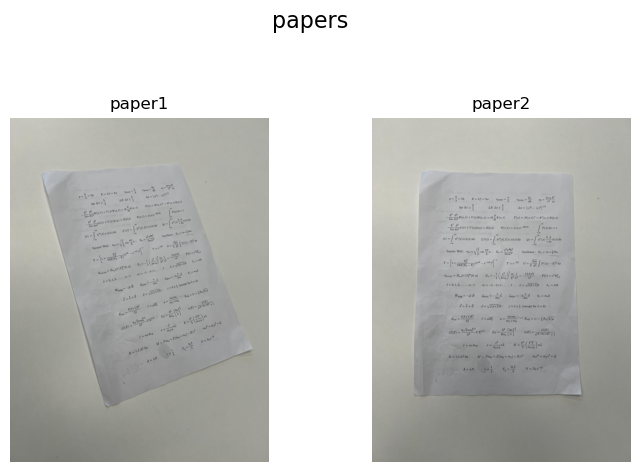

In [3]:
paper1 = Image(1536, 2048, 3)
paper1.load("images/Project/paper1.raw")
# paper1 = paper1.scale(paper1, 0.2, 0.2)

paper2 = Image(1536, 2048, 3)
paper2.load("images/Project/paper2.raw")
# paper2 = paper2.scale(paper2, 0.2, 0.2)

show_images([paper1, paper2], ["paper1", "paper2"], "papers")

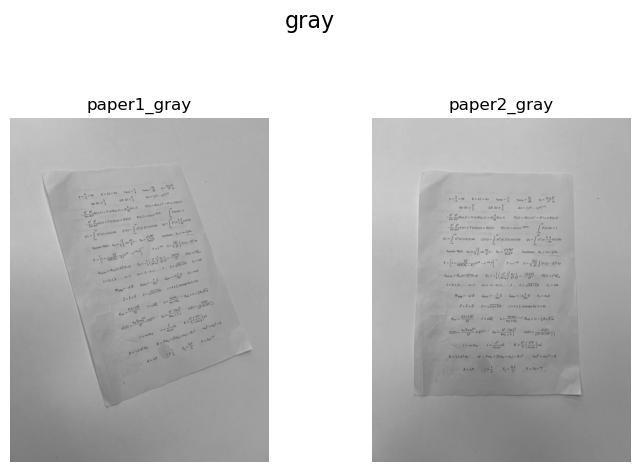

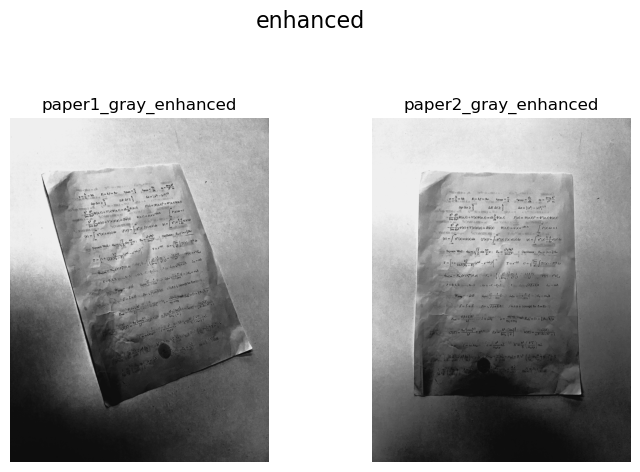

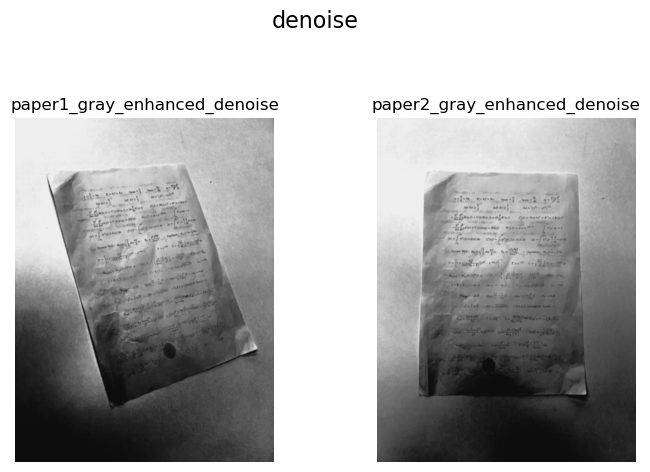

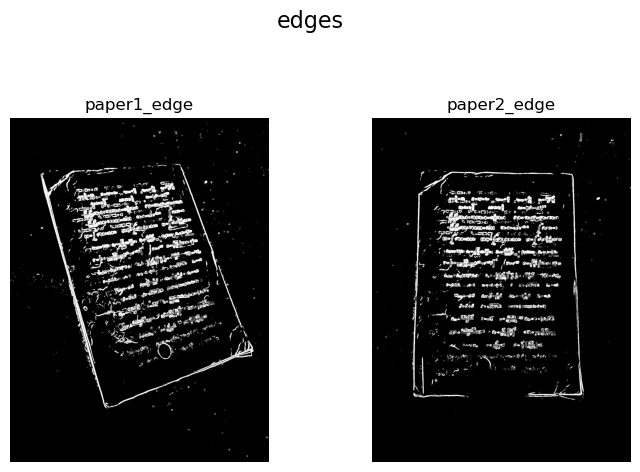

In [36]:
paper1_gray = Image.gray_scale(paper1)
paper2_gray = Image.gray_scale(paper2)

paper1_gray_enhanced = Image.hist_equalize(paper1_gray, 0, 16)
paper2_gray_enhanced = Image.hist_equalize(paper2_gray, 0, 16)

paper1_gray_enhanced_denoise = Image.mean_denoise(paper1_gray_enhanced, 0, 7)
paper2_gray_enhanced_denoise = Image.mean_denoise(paper2_gray_enhanced, 0, 7)

paper1_edge = Image.sobel_edge(paper1_gray_enhanced_denoise, 0, 5, "none", "hysteresis", { "low_threshold": 190, "high_threshold": 200 })
paper2_edge = Image.sobel_edge(paper2_gray_enhanced_denoise, 0, 5, "none", "hysteresis", { "low_threshold": 190, "high_threshold": 200 })

show_images([paper1_gray, paper2_gray], ["paper1_gray", "paper2_gray"], "gray")
show_images([paper1_gray_enhanced, paper2_gray_enhanced], ["paper1_gray_enhanced", "paper2_gray_enhanced"], "enhanced")
show_images([paper1_gray_enhanced_denoise, paper2_gray_enhanced_denoise], ["paper1_gray_enhanced_denoise", "paper2_gray_enhanced_denoise"], "denoise")
show_images([paper1_edge, paper2_edge], ["paper1_edge", "paper2_edge"], "edges")

Bounding box 1: ((182, 339), (563, 1722), (447, 319), (572, 1729))
Bounding box 2: ((1115, 336), (1252, 1633), (1186, 338), (1254, 1631))


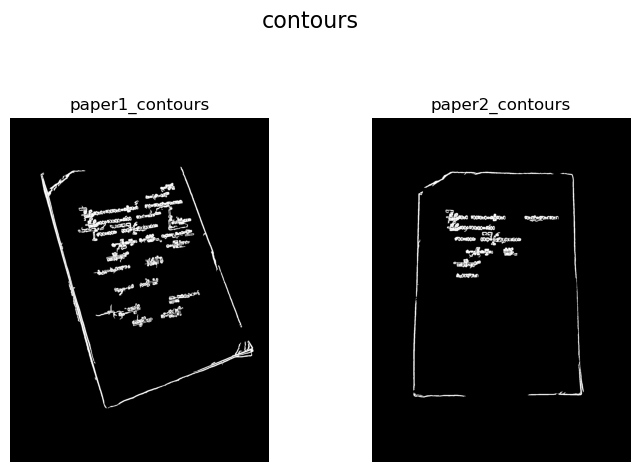

In [39]:
paper1_contours = paper1_edge.get_edge_contours()
paper2_contours = paper2_edge.get_edge_contours()

paper1_contours_image = paper1_edge.edge_contours(paper1_edge, 2000)
paper2_contours_image = paper2_edge.edge_contours(paper2_edge, 2000)

def get_bounding_box(contours):
    longest_contour = max(contours, key=len)
    top_left = min(longest_contour, key=lambda point: (point[0] + point[1]))
    bottom_left = min(longest_contour, key=lambda point: (point[0] - point[1]))
    top_right = max(longest_contour, key=lambda point: (point[0] - point[1]))
    bottom_right = max(longest_contour, key=lambda point: (point[0] + point[1]))
    return top_left, bottom_left, top_right, bottom_right

bounding_box1 = get_bounding_box(paper1_contours)
bounding_box2 = get_bounding_box(paper2_contours)

print("Bounding box 1:", bounding_box1)
print("Bounding box 2:", bounding_box2)

show_images([paper1_contours_image, paper2_contours_image], ["paper1_contours", "paper2_contours"], "contours")

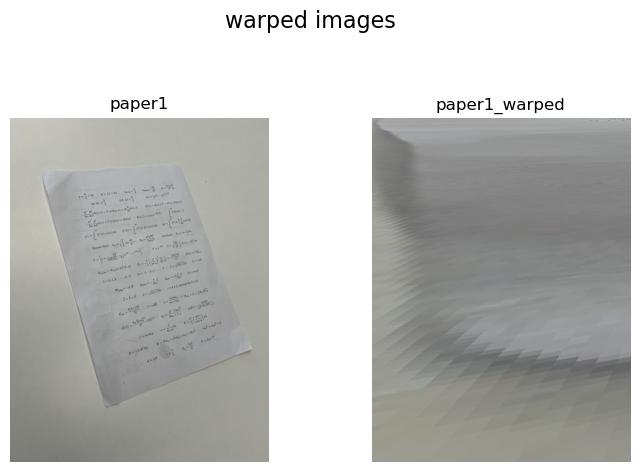

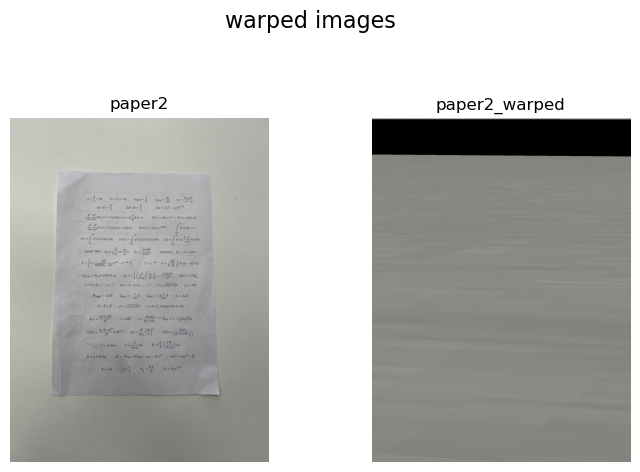

In [40]:
paper1_warped = Image.perspective_warp(paper1, bounding_box1)
paper2_warped = Image.perspective_warp(paper2, bounding_box2)

paper1_warped.save("output/paper1_warped.raw")
paper2_warped.save("output/paper2_warped.raw")

show_images([paper1, paper1_warped], ["paper1", "paper1_warped"], "warped images")
show_images([paper2, paper2_warped], ["paper2", "paper2_warped"], "warped images")